<a href="https://colab.research.google.com/github/rohansiddam/Python-Journey/blob/main/074%20-%20Lesson%2074%20(Logistic%20Regression%20-%20Decision%20Boundary).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lesson 74: Logistic Regression - Decision Boundary

### Teacher-Student Activities

In the previous class, you learnt to build a logistic regression model purely using the sigmoid function and predicted the outcomes i.e. the patients having and not having heart disease by choosing different threshold values.

In this class, you will create a linear function using the features in the dataset and pass it as an input to the sigmoid function. However, we will take a small detour from the heart disease prediction dataset and choose the ideal data to understand the rationale behind building a linear function.

---

#### Activity 1: Create Dummy Dataset^

Let's create a dummy dataset having two columns representing two independent variables, another column representing the target and a total of 1000 records (or rows).

You will shortly get to know the reason behind the creation of a dummy data-frame.

To create a dummy data-frame, firstly, create two arrays using the `make_blob()` function of the `sklearn.datasets` module. The syntax for the `make_blob()` function is as follows:

**Syntax:** `make_blobs(n_samples, centers, n_features, random_state, cluster_std)`

where

- `n_samples` determines the number of records to be generated in a dataset

- `centers` determines the number of classes to be generated (or labels) for the target column

- `n_features` determines the number of features (or independent variables) to be generated in the dataset

- `random_state` determines the random number generation for dataset creation. An integer value of the `random_state` parameter will produce the same results across different function calls. Popular integer random seeds are 0 and 42.

- `cluster_std` determines the standard deviation of the clusters.

The function will return two arrays. You can store these two arrays in two variables, say `features_array` and `target_array`, where the former contains features (or independent variables) and the latter contains the target or (dependent variable).

In [ ]:
# T1.1: Create two arrays using the 'make_blobs()' function and store them in the 'features_array' and 'target_array' variables

from sklearn.datasets import make_blobs

feature_array, target_array = make_blobs(n_samples = 1000, centers = 2, n_features = 42, cluster_std = 1.25)

print(feature_array)
print(feature_array.shape)
print(type(feature_array))
print(target_array)
print(target_array.shape)
print(type(target_array))

[[-1.49779908 10.03519649  0.84019976 ...  1.67288952 -0.18851765
   6.13956518]
 [-6.99833628  4.37708685 -6.48471017 ...  0.72939121  3.30701473
  -9.64473009]
 [-1.05827307 10.76990889  0.88939988 ...  0.28502407 -1.71368639
   9.27189787]
 ...
 [-0.20906292  7.88591349 -0.83258117 ...  1.13664216 -1.63792818
   8.16514359]
 [-7.91118957  4.31559415 -8.28529189 ...  1.07624576  6.24688275
  -9.09020866]
 [-0.30570905 10.08412119 -0.28377919 ...  3.25238958 -0.78873145
   7.2348478 ]]
(1000, 42)
<class 'numpy.ndarray'>
[1 0 1 0 1 0 1 1 1 1 0 1 0 0 0 1 0 0 1 1 1 1 0 1 1 1 1 0 0 1 1 0 1 1 0 0 0
 0 1 1 0 1 0 0 1 0 1 1 1 1 0 0 1 1 1 0 1 1 0 1 0 0 1 0 1 1 0 0 0 1 0 1 0 1
 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 0 1 0 1 0 1 0 0 1 1 0 0 0 0 1 1 1 0 1 1 1
 0 0 0 1 0 0 1 1 0 0 1 1 1 0 0 0 0 1 1 1 1 0 0 1 1 1 0 0 1 1 1 0 1 1 0 0 1
 1 0 1 0 0 1 1 1 1 1 0 1 0 0 1 1 1 0 0 1 1 0 1 1 0 0 0 1 0 1 0 0 1 1 1 1 1
 0 1 0 0 1 0 1 1 1 0 0 1 0 0 0 1 0 1 0 1 1 1 1 0 0 1 0 0 0 1 0 1 1 1 0 1 1
 1 1 0 0 1 1 1 1 1 0 0 

**Note:** The `make_blobs()` function can take in more parameters that can be passed to create more customised data. You may refer to the following document:

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html

You can find out the object-type of the arrays created by the `make_blob()` function and the number of rows and columns in them.

In [ ]:
# S1.1: Find out the object-type of the arrays created by the 'make_blob()' function and the number of rows and columns in them.
import pandas as pd

dummy_dict = {'col1' : [feature_array[i][0] for i in range(feature_array.shape[0])], 'col2' : [feature_array[i][1] for i in range(feature_array.shape[0])],
              'target' : target_array}


In [ ]:
dummy_df = pd.DataFrame.from_dict(dummy_dict)
dummy_df

,col1,col2,target
0,-1.497799,10.035196,1
1,-6.998336,4.377087,0
2,-1.058273,10.769909,1
3,-6.867707,3.583060,0
4,-2.095896,7.963930,1
...,...,...,...
995,-1.106986,8.282446,1
996,0.397230,8.221633,1
997,-0.209063,7.885913,1
998,-7.911190,4.315594,0


Now that you have created two arrays, as the next step to create a dummy data-frame, create a Python dictionary from the two arrays and then a Pandas DataFrame from the dictionary using the `from_dict()` function of the `pandas` module.

**Syntax:** `pd.DataFrame.from_dict(some_dictionary)`

In [ ]:
# S1.2: Create a Pandas DataFrame containing the items from the 'features_array' and 'target_array' arrays.
dummy_df['target'].value_counts()

1    500
0    500
Name: target, dtype: int64

Now we have a `pandas` DataFrame having 1000 records, 3 columns out of which 2 columns represent independent variables and 1 represent target.

Let's count the number of 0s and 1s in the `target` column of the `dummy_df` DataFrame.


In [ ]:
# S1.3: Display the number of occurrences of each label in the 'target' column.


As you can see, both the labels (0s and 1s) are equal in number in the `target` column.


---

#### Activity 2: Cluster Visualisation^^

If you create a scatter plot between the columns `col 1` and `col 2` for the labels 0 and 1, then you will see two clusters of dots (or points).

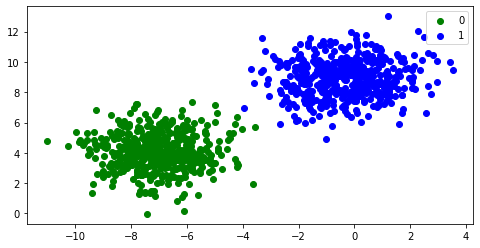

In [ ]:
# S2.1: Create a scatter plot between 'col 1' and 'col 2' columns separately for both the classes in the same plot.
import matplotlib.pyplot as plt

plt.figure(figsize = (8,4))
plt.scatter(x = dummy_df.loc[dummy_df['target'] == 0, 'col1'], y = dummy_df.loc[dummy_df['target'] == 0, 'col2'], color = 'green', label = '0')
plt.scatter(x = dummy_df.loc[dummy_df['target'] == 1, 'col1'], y = dummy_df.loc[dummy_df['target'] == 1, 'col2'], color = 'blue', label = '1')
plt.legend()
plt.show()


This is the reason behind creating a dummy data-frame. Here, you can clearly see that two different coloured clusters are formed for the two different labels (or classes). You can draw an imaginary straight line to separate the two clusters from each other.

For the sake of better understanding, let's assume that the equation of the straight line separating the two clusters is $x = 1$ (*even if the equation is incorrect*).

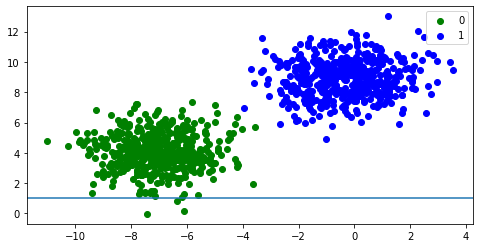

In [ ]:
# S2.2: Plot the line x = 1 in the above scatter plot.
plt.figure(figsize = (8,4))
plt.scatter(x = dummy_df.loc[dummy_df['target'] == 0, 'col1'], y = dummy_df.loc[dummy_df['target'] == 0, 'col2'], color = 'green', label = '0')
plt.scatter(x = dummy_df.loc[dummy_df['target'] == 1, 'col1'], y = dummy_df.loc[dummy_df['target'] == 1, 'col2'], color = 'blue', label = '1')
plt.axhline(y = 1)
plt.legend()
plt.show()

So any point on the left-hand side of the line can be classified as 0 and any point on the right-hand side of the line can be classified as 1. This imaginary straight line separating the two clusters and classifying the points as 0 and 1 is called the **decision boundary**.

Keeping the same idea in mind, you can conclude that you need more and more features in a dataset so that different clusters could be formed for different classes and these clusters can be separated by a decision boundary.

To keep things simple, for this dummy dataset, we will consider only two features (or independent variables) to have a two-dimensional decision boundary. If we consider more than two features, then we will have to deal with a higher-dimensional decision boundary which is difficult to visualise on a two-dimensional plane.

Your next task is to find out the equation of this decision boundary. The required equation will be the input to the sigmoid function to get the probabilities. Then w.r.t. a threshold value, you can classify the outcomes as 0 and 1.

**Equation of a Straight Line in General Form**

Before continuing ahead with the decision boundary, let's learn the equation of a straight line in the general form.

You already know that the equation of a straight line is given as

$$y = mx + c$$

where

- $m$ is the slope of a line and

- $c$ is the intercept made by the line on the $y$-axis

The equation of a straight line in the **general form** is given as

$$ax + by + c = 0$$

where

- $a$ is the coefficient of $x$,

- $b$ is the coefficient of $y$, and

- $c$ is some arbitrary constant

If you rewrite the above general equation as follows

$$by = -ax - c$$
$$\Rightarrow y = - \left(\frac{a}{b}\right) x - \frac{c}{b}$$

then you get the equation of the straight line back in the **slope-intercept** form where

- the slope is $-\frac{a}{b}$; more precisely $-\frac{\text{coefficient of } x}{\text{coefficient of }y}$ and

- the intercept-made by the line on the $y$-axis is $-\frac{c}{b}$; more precisely $-\frac{\text{arbitrary constant}}{\text{coefficient of }y}$

**Note:** The $c$ in $y = mx + c$ is **not** the same as the $c$ in $ax + by + c = 0$

With the knowledge of the general form of the equation of a straight line, you can assume that the equation of the decision boundary is

$$\beta_0 + \beta_1 x_1 + \beta_2 x_2 = 0$$

or

$$\beta_1 x_1 + \beta_2 x_2 + \beta_0 = 0$$

If you compare it with the equation of a straight line in the general form,

$$ax + by + c = 0$$

then

$$\beta_1 = a, x_1 = x, \beta_2 = b, x_2 = y \space{} \text{and} \space{} \beta_0 = c$$

In this case, $x_1$ and $x_2$ represent the `col 1` and `col 2` columns respectively.

To find this decision boundary (the straight line given by $\beta_0 + \beta_1 x_1 + \beta_2 x_2 = 0$), you need to build a logistic regression model between $x_1$ and $x_2$. From this model, you will get the coefficients i.e., $\beta_0, \beta_1$ and $\beta_2$.

So now, calculate the coefficients.

In [ ]:
# S2.3: Calculate the coefficients by building a logistic regression model using the 'sklearn' model.
from sklearn.linear_model import LogisticRegression

x = dummy_df[dummy_df.columns[:-1]]
y = dummy_df['target']

def decision_boundary(x,y):
  log_reg = LogisticRegression(random_state = 0).fit(x,y)
  coef_list = list(log_reg.intercept_) + list(log_reg.coef_[0])
  return coef_list


Now that you have the required coefficients, you can get the equation of the decision boundary (in this case; a straight line).

Next, let's plot the decision boundary (or straight line) in the above scatter plot. To plot the line, you can

- plot the `col 1` values on the $x$-axis

- calculate the `col 2` values from the $\beta_0, \beta_1, \beta_2$ and the `col 1` values using the expression
  $$x_2 = - \left( \frac{\beta_1}{\beta_2} \right) x_1 - \frac{\beta_0}{\beta_2}$$
  or
  $$x_2 = - \left( \frac{\beta_1 x_1 + \beta_0}{\beta_2} \right)$$
  or
  $$x_2 =  \left( \frac{- \beta_0-\beta_1 x_1}{\beta_2} \right)$$

In [ ]:
# S2.4: Plot the calculated regression line in above scatter plot.
beta_vals = decision_boundary(x,y)
beta_vals

[-1.302997517490581, 2.128239973750217, 1.4126820764571486]

As you can see, the decision boundary clearly separates the two clusters for the two classes.

---

#### Activity 3: Predictions^^^

Now, your next task is to predict the `target` values based on the `col 1` and `col 2` values using the sigmoid function and some threshold value, say 0.5.

Let's rewrite the sigmoid function as
$$p =  \frac{1}{1 + e^{-h}}$$

where
- $p$ is the probability value between 0 and 1
- $h$ is some relationship between $x_1, x_2, x_3, \dots, x_n$
- $x_1, x_2, x_3, \dots, x_n$ are $n \in N$ feature(s) in a dataset

In this case of dummy dataset, $h = \beta_0 + \beta_1 x_1 + \beta_2 x_2$

You can also read $h$ as a **hypothesis**. In a broader sense, to predict the labels 0 and 1 through logistic regression for the dummy dataset, you need to pass a hypothesis as an input to the sigmoid function. In this case, the hypothesis is that the `col 1` and `col 2` values have a linear relationship ($h = \beta_0 + \beta_1 x_1 + \beta_2 x_2$) that predicts the labels 0 and 1.

$$\therefore p =\frac{1}{1 + e^{-(\beta_0 + \beta_1 x_1 + \beta_2 x_2)}}$$

where $\beta_0, \beta_1, \beta_2$ are coefficients and $x_1, x_2$ are the independent variables.

The above expression can also be written as

$$p =\frac{1}{1 + e^{-BX^T}}$$

where

- $X$ denotes the feature matrix i.e.

  $$X = \begin{bmatrix} 1 & x_{1,1} & x_{2,1} \\ 1 & x_{1,2} & x_{2,2}\\ 1 & x_{1,3} & x_{2,3} \\ \vdots & \vdots & \vdots \\ 1 & x_{1,1000} & x_{2,1000} \end{bmatrix}$$

  Each item in the above matrix can be represented by $x_{i,j}$ where $x_{i,j}$ denotes the $j^{\text{th}}$ item in the $i^{\text{th}}$ column. Also the values of $i$ goes from $1$ to $2$ and the values of $j$ goes from $1$ to $1000$.

- $B$ denotes the regression coefficients matrix i.e.

  $$B = \begin{bmatrix} \beta_0 & \beta_1 & \beta_2\end{bmatrix}$$

Essentially, $$h = BX^T$$


The above product after taking the transpose of the features matrix becomes

$$h = \begin{bmatrix} \beta_0 & \beta_1 & \beta_2\end{bmatrix} \begin{bmatrix} 1 & 1 & 1 & \dots & 1 \\ x_{1,1} & x_{1,2} & x_{1,3} & \dots & x_{1,1000} \\ x_{2,1} & x_{2,2} & x_{2,3} & \dots & x_{2,1000} \end{bmatrix}$$

So let's create the `sigmoid()` function in Python that takes the arrays containing the features and the regression coefficients as inputs and returns the probability values as output. But first, you need to add a column containing 1s to the features array.

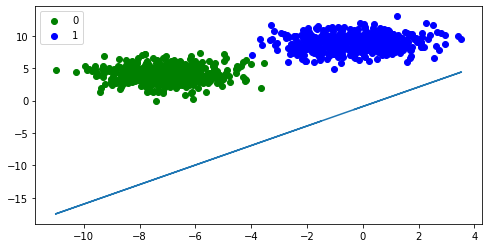

In [ ]:
# S3.1: Add a column containing 1s to the features array.
pred_vals = (beta_vals[0] + beta_vals[1] * dummy_df['col1']) / beta_vals[2]

plt.figure(figsize = (8,4))
plt.scatter(x = dummy_df.loc[dummy_df['target'] == 0, 'col1'], y = dummy_df.loc[dummy_df['target'] == 0, 'col2'], color = 'green', label = '0')
plt.scatter(x = dummy_df.loc[dummy_df['target'] == 1, 'col1'], y = dummy_df.loc[dummy_df['target'] == 1, 'col2'], color = 'blue', label = '1')
plt.plot(dummy_df['col1'], pred_vals)
plt.legend()
plt.show()

In the above code:

1. `np.ones(shape = (features_array.shape[0], 1)` generates a NumPy array containing 1s and has 1000 rows and 1 column.

2. `np.append()` function adds the `features_array` to the array created in the first step column-wise (denoted by `axis = 1`). The general syntax is
   `np.append(parent_matrix, matrix_to_be_added_to_the_parent_matrix)`


In [ ]:
# S3.2 Create the 'sigmoid()' function.
import numpy as np

def sigmoid(feature_matrix, coef_matrix):
  sigmoid = 1 / (1 + np.exp(-1 * np.matmul(coef_matrix, np.transpose(feature_matrix))))
  return pd.Array(sigmoid)


In [ ]:
new_feature_array = np.append(np.ones(shape = (feature_array.shape[0], 1)), feature_array, axis = 1)
print(new_feature_array)
print(new_feature_array.shape)

[[ 1.         -1.49779908 10.03519649 ...  1.67288952 -0.18851765
   6.13956518]
 [ 1.         -6.99833628  4.37708685 ...  0.72939121  3.30701473
  -9.64473009]
 [ 1.         -1.05827307 10.76990889 ...  0.28502407 -1.71368639
   9.27189787]
 ...
 [ 1.         -0.20906292  7.88591349 ...  1.13664216 -1.63792818
   8.16514359]
 [ 1.         -7.91118957  4.31559415 ...  1.07624576  6.24688275
  -9.09020866]
 [ 1.         -0.30570905 10.08412119 ...  3.25238958 -0.78873145
   7.2348478 ]]
(1000, 43)


**Note:** The matrix multiplication rules are applicable to the NumPy arrays as well.

Now, let's create a scatter plot between the $h = \beta_0 + \beta_1 x_1 + \beta_2 x_2$ values and their corresponding sigmoid outputs.

In [ ]:
def sigmoid(features_matrix, coef_matrix):
    sigmoid_output_matrix = 1/(1 + np.exp(-1 * np.matmul(coef_matrix, np.transpose(features_matrix))))
    return np.array(sigmoid_output_matrix)

new_feature_df = pd.DataFrame(new_feature_array)
new_feature_df

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
0,1.0,-1.497799,10.035196,0.840200,-5.707698,8.167617,-9.323466,-3.551138,6.058898,-8.232926,...,-4.477734,1.583983,-6.055876,-9.365848,-7.358874,-8.233509,-5.245205,1.672890,-0.188518,6.139565
1,1.0,-6.998336,4.377087,-6.484710,2.779298,-7.934115,-10.083728,-2.113597,-1.220110,2.956639,...,6.658427,-1.633684,-7.705663,-6.468424,10.318392,3.384956,-7.154858,0.729391,3.307015,-9.644730
2,1.0,-1.058273,10.769909,0.889400,-4.850116,8.886271,-8.179478,-3.715794,5.979643,-7.445813,...,-5.586367,1.151419,-8.145260,-8.217145,-6.033866,-4.271116,-4.268057,0.285024,-1.713686,9.271898
3,1.0,-6.867707,3.583060,-8.427721,1.487085,-8.807198,-8.665976,-1.336047,1.941540,-0.175262,...,8.377716,-1.451239,-4.422577,-5.241272,8.676884,4.057305,-5.101096,4.023815,3.975721,-8.361521
4,1.0,-2.095896,7.963930,-0.902509,-5.654748,7.873805,-11.295901,-4.269109,6.312600,-7.702338,...,-4.817290,1.668884,-6.832961,-10.118096,-7.057126,-6.049081,-7.382427,-0.602322,0.488618,6.419303
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.0,-1.106986,8.282446,-0.057261,-6.116476,6.911354,-10.068813,-3.728276,8.141376,-8.906317,...,-5.964503,1.251278,-7.992002,-7.283662,-8.705102,-5.465174,-6.161965,1.315934,-0.751699,7.218415
996,1.0,0.397230,8.221633,-0.405807,-6.061672,9.010422,-9.003665,-4.968680,3.682789,-8.528947,...,-6.799213,-0.125058,-7.804038,-8.456088,-6.736317,-6.832784,-5.073031,0.833106,0.641389,4.754590
997,1.0,-0.209063,7.885913,-0.832581,-3.604548,6.250600,-8.479566,-3.818853,6.423736,-10.164703,...,-3.844384,0.728842,-5.884556,-7.001874,-6.646043,-6.852759,-3.688048,1.136642,-1.637928,8.165144
998,1.0,-7.911190,4.315594,-8.285292,2.626463,-8.667918,-9.731549,-2.196998,0.032406,4.300867,...,7.389844,0.544534,-8.915351,-4.340385,7.940020,3.961646,-5.271253,1.076246,6.246883,-9.090209


In [ ]:
# S3.3: Create a scatter plot between the 'h' values and their corresponding sigmoid outputs.
sigmoid(new_feature_array, beta_vals)

ValueError: ignored

In [ ]:
feature_array.shape[0]

As you can see, the above plot follows the sigmoid curve.

Now, let's predict the target values w.r.t. the threshold value of 0.5

In [ ]:
# S3.4: Predict the target values w.r.t. the threshold value of 0.5


Finally, let's calculate the accuracy of the logistic regression model built through a confusion matrix, precision value, recall value and f1-score.

In [ ]:
# S3.5: Evaluate the accuracy of the logistic regression model built through a confusion matrix, precision value, recall value and f1-score.


As you can see,
- The FP and FN values in the confusion matrix are 0
- The precision and recall values are 1
- The f1-score is also 1

This clearly shows that the decision boundary accurately separates the labels (or classes) with 100% accuracy.

Let's stop here. In the next class, we will study more concepts on logistic regression.

---